In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("SuperStoreSalesDataSet.xlsx")

In [3]:
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [4]:
df.tail()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
5896,907,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,NaN,COD,NaN,NaN
5897,1297,CA-2020-115427,2020-12-30,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online,NaN,NaN
5898,5092,CA-2020-156720,2020-12-30,2021-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online,NaN,NaN
5899,909,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3,19.7910,NaN,COD,NaN,NaN
5900,5093,CA-2020-151450,2020-12-31,2021-01-04,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,Office Supplies,Fasteners,Bagged Rubber Bands,2975.510,3,-0.6048,NaN,COD,NaN,NaN


In [5]:
df.shape

(5901, 23)

In [6]:
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1',
       'ind2'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5901 non-null   int64         
 1   Order ID          5901 non-null   object        
 2   Order Date        5901 non-null   datetime64[ns]
 3   Ship Date         5901 non-null   datetime64[ns]
 4   Ship Mode         5901 non-null   object        
 5   Customer ID       5901 non-null   object        
 6   Customer Name     5901 non-null   object        
 7   Segment           5901 non-null   object        
 8   Country           5901 non-null   object        
 9   City              5901 non-null   object        
 10  State             5901 non-null   object        
 11  Region            5901 non-null   object        
 12  Product ID        5901 non-null   object        
 13  Category          5901 non-null   object        
 14  Sub-Category      5901 n

In [8]:
df.describe(include = "object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Payment Mode
count,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901
unique,3003,4,773,773,3,1,452,49,4,1755,3,17,1742,3
top,CA-2020-100111,Standard Class,EP-13915,Emily Phan,Consumer,United States,New York City,California,West,TEC-AC-10003832,Office Supplies,Binders,Easy-staple paper,COD
freq,14,3451,27,27,2997,5901,563,1189,1901,15,3569,915,27,2453


In [9]:
for col in df.describe(include = "object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

Order ID
['CA-2019-160304' 'CA-2019-125206' 'US-2019-116365' ... 'CA-2020-115427'
 'CA-2020-156720' 'CA-2020-151450']
--------------------------------------------------
Ship Mode
['Standard Class' 'First Class' 'Second Class' 'Same Day']
--------------------------------------------------
Customer ID
['BM-11575' 'LR-16915' 'CA-12310' 'BO-11350' 'EB-13975' 'BP-11185'
 'AJ-10795' 'DW-13480' 'NM-18520' 'JO-15145' 'VS-21820' 'LA-16780'
 'MF-17665' 'KB-16585' 'JB-16000' 'DE-13255' 'MP-17470' 'AG-10675'
 'Dp-13240' 'RC-19825' 'WB-21850' 'BE-11335' 'EH-13945' 'CC-12430'
 'DL-13495' 'TD-20995' 'PG-18895' 'CM-11935' 'MC-17275' 'FP-14320'
 'BT-11530' 'TB-21280' 'CB-12415' 'CB-12535' 'HG-14965' 'TB-21355'
 'JD-15895' 'JF-15490' 'SC-20725' 'TB-21250' 'HE-14800' 'DF-13135'
 'SC-20050' 'AB-10150' 'JK-15325' 'BF-11170' 'CK-12760' 'SM-20950'
 'AB-10105' 'SE-20110' 'NS-18640' 'LC-17050' 'TB-21520' 'MS-17365'
 'JB-15400' 'PP-18955' 'AZ-10750' 'KB-16240' 'CA-12265' 'BE-11410'
 'CH-12070' 'MH-17440' 'JR-16

In [10]:
df.isnull().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64

In [11]:
df.drop(["ind1", "ind2"], axis = 1, inplace = True)

In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns             0
Payment Mode        0
dtype: int64

In [14]:
df.describe()

,Row ID+O6G3A1:R6,Order Date,Ship Date,Sales,Quantity,Profit,Returns
count,287.000000,287,287,287.000000,287.000000,287.000000,287.0
mean,5320.473868,2020-08-15 17:33:39.512195072,2020-08-19 16:08:21.742160384,307.897261,3.937282,53.794241,1.0
min,447.000000,2020-01-14 00:00:00,2020-01-18 00:00:00,73.780000,1.000000,-386.391600,1.0
25%,2965.500000,2020-06-10 00:00:00,2020-06-13 00:00:00,119.845000,2.000000,3.468600,1.0
50%,5650.000000,2020-09-09 00:00:00,2020-09-13 00:00:00,153.480000,3.000000,10.393600,1.0
75%,7937.500000,2020-11-15 00:00:00,2020-11-18 00:00:00,302.837000,5.000000,26.985150,1.0
max,9993.000000,2020-12-30 00:00:00,2021-01-03 00:00:00,3445.960000,14.000000,6719.980800,1.0
std,2758.909971,NaN,NaN,433.938783,2.441534,405.172616,0.0


In [15]:
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')

In [16]:
df["Segment"]

2626     Consumer
2635     Consumer
2637     Consumer
2640     Consumer
2641     Consumer
          ...    
5880     Consumer
5890     Consumer
5892     Consumer
5895    Corporate
5897    Corporate
Name: Segment, Length: 287, dtype: object

In [17]:
df['Segment'].max()

'Home Office'

In [18]:
df[['Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode']].max()

Segment                                      Home Office
Country                                    United States
City                                          Wilmington
State                                          Wisconsin
Region                                              West
Product ID                               TEC-PH-10004977
Category                                      Technology
Sub-Category                                      Tables
Product Name    iHome FM Clock Radio with Lightning Dock
Sales                                            3445.96
Quantity                                              14
Profit                                         6719.9808
Returns                                              1.0
Payment Mode                                      Online
dtype: object

In [19]:
df[['Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode']].min()

Segment                                                  Consumer
Country                                             United States
City                                                 Apple Valley
State                                                     Arizona
Region                                                    Central
Product ID                                        FUR-BO-10001337
Category                                                Furniture
Sub-Category                                          Accessories
Product Name    "While you Were Out" Message Book, One Form pe...
Sales                                                       73.78
Quantity                                                        1
Profit                                                  -386.3916
Returns                                                       1.0
Payment Mode                                                  COD
dtype: object

In [20]:
# Assuming you have already loaded and preprocessed your data into a DataFrame named df

# Selecting relevant features for segmentation
segmentation_features = df[['Customer ID', 'Segment', 'Country', 'City', 'State', 'Region','Sales', 'Quantity', 'Profit', 'Payment Mode']]

# Checking the first few rows to verify if the selection is correct
print(segmentation_features.head())


     Customer ID   Segment        Country          City      State Region  \
2626    BH-11710  Consumer  United States  Johnson City  Tennessee  South   
2635    BH-11710  Consumer  United States  Johnson City  Tennessee  South   
2637    BH-11710  Consumer  United States  Johnson City  Tennessee  South   
2640    BH-11710  Consumer  United States  Johnson City  Tennessee  South   
2641    BH-11710  Consumer  United States  Johnson City  Tennessee  South   

        Sales  Quantity   Profit Payment Mode  
2626  129.984         2   6.9990       Online  
2635  101.508         2  -1.8392        Cards  
2637  122.970         5  -4.5770       Online  
2640  136.336         3   6.6468        Cards  
2641  157.288         7  12.7008          COD  


In [21]:
# Selecting relevant features for clustering
clustering_features = df[['Sales', 'Quantity', 'Profit']]

# Standardize the features by scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Choosing the number of clusters (k)
k = 5  # You can adjust this value based on your specific business needs or using techniques like the elbow method

# Applying K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Adding cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Displaying the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=clustering_features.columns))

# Displaying the count of customers in each cluster
print("\nCount of customers in each cluster:")
print(df['Cluster'].value_counts())

Cluster Centers:
         Sales  Quantity       Profit
0   208.378676  2.187097    17.223968
1  3445.960000  4.000000  6719.980800
2  1885.972667  6.416667   297.312833
3   295.708866  8.146341    33.394685
4   229.052867  4.820513    14.260453

Count of customers in each cluster:
Cluster
0    155
4     78
3     41
2     12
1      1
Name: count, dtype: int64


  File "C:\Users\darwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [22]:
from sklearn.metrics import silhouette_score

# Silhouette Score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)


Silhouette Score: 0.47029052401125204
Within-Cluster Sum of Squares (WCSS): 135.49824193861585


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 2626 to 5897
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  287 non-null    int64         
 1   Order ID          287 non-null    object        
 2   Order Date        287 non-null    datetime64[ns]
 3   Ship Date         287 non-null    datetime64[ns]
 4   Ship Mode         287 non-null    object        
 5   Customer ID       287 non-null    object        
 6   Customer Name     287 non-null    object        
 7   Segment           287 non-null    object        
 8   Country           287 non-null    object        
 9   City              287 non-null    object        
 10  State             287 non-null    object        
 11  Region            287 non-null    object        
 12  Product ID        287 non-null    object        
 13  Category          287 non-null    object        
 14  Sub-Category      287 non-n

In [24]:
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'Cluster'],
      dtype='object')

Total number of unique row IDs: 287


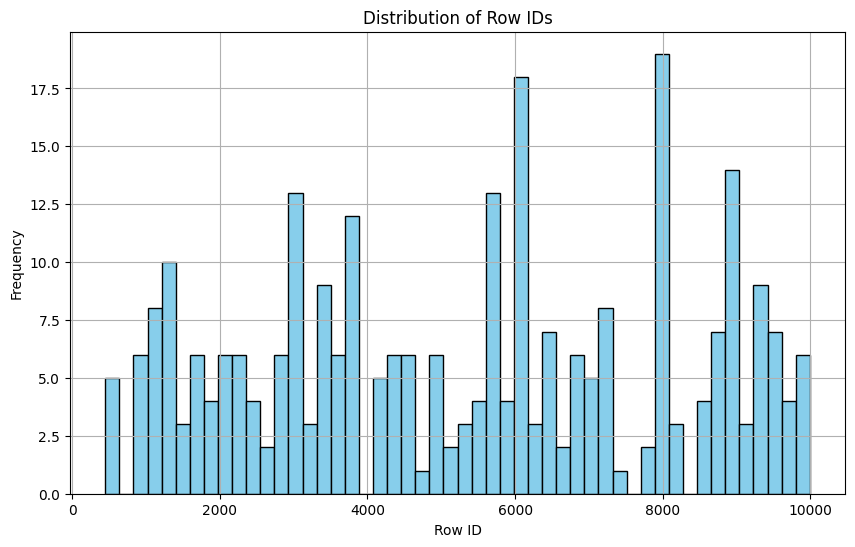

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Check the total number of unique row IDs
unique_row_ids = df['Row ID+O6G3A1:R6'].nunique()
print("Total number of unique row IDs:", unique_row_ids)

# Visualize the distribution of row IDs
plt.figure(figsize=(10, 6))
plt.hist(df['Row ID+O6G3A1:R6'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Row IDs')
plt.xlabel('Row ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [26]:
# Frequency of orders
order_frequency = df['Order ID'].value_counts()

# Explore order patterns
order_patterns = df['Order ID'].unique()

# Display results
print("Frequency of orders:")
print(order_frequency)
print("\nNumber of unique order IDs:", len(order_patterns))


Frequency of orders:
Order ID
CA-2020-100111    14
US-2020-118087     8
CA-2020-161956     8
US-2020-147886     7
US-2020-109253     7
                  ..
CA-2020-118122     1
CA-2020-138163     1
CA-2020-117513     1
CA-2020-142888     1
CA-2020-156391     1
Name: count, Length: 104, dtype: int64

Number of unique order IDs: 104


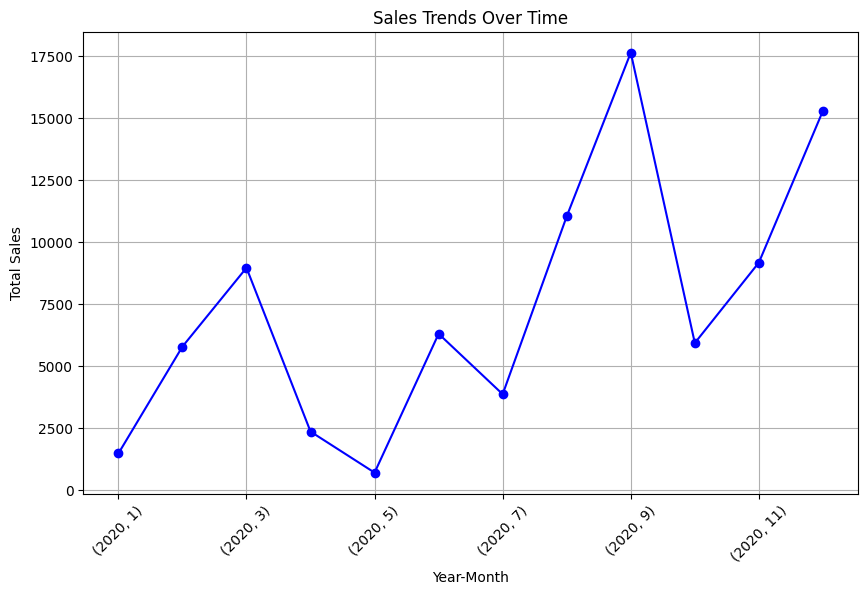

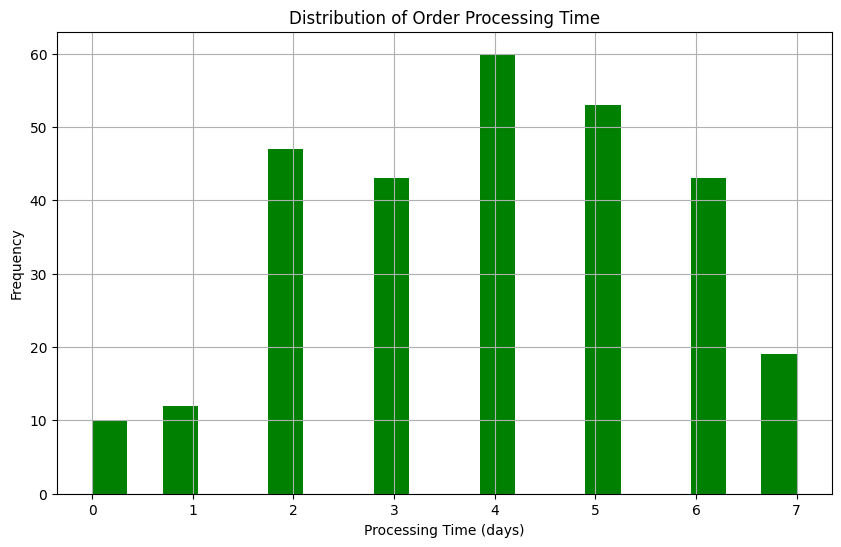

In [27]:
# Assuming df is the DataFrame containing the dataset

# Convert 'Order Date' and 'Ship Date' columns to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year and month from 'Order Date'
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month

# Extract year and month from 'Ship Date'
df['Ship_Year'] = df['Ship Date'].dt.year
df['Ship_Month'] = df['Ship Date'].dt.month

# Calculate sales trends over time
sales_trend = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum()

# Calculate order processing times
df['Processing_Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Visualize sales trends over time
sales_trend.plot(kind='line', figsize=(10, 6), marker='o', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Visualize order processing times
df['Processing_Time'].plot(kind='hist', bins=20, figsize=(10, 6), color='green')
plt.title('Distribution of Order Processing Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


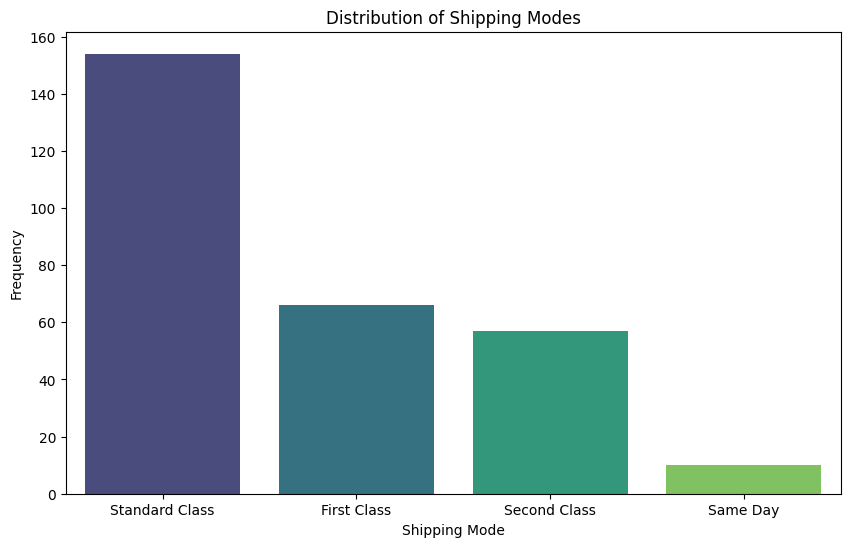

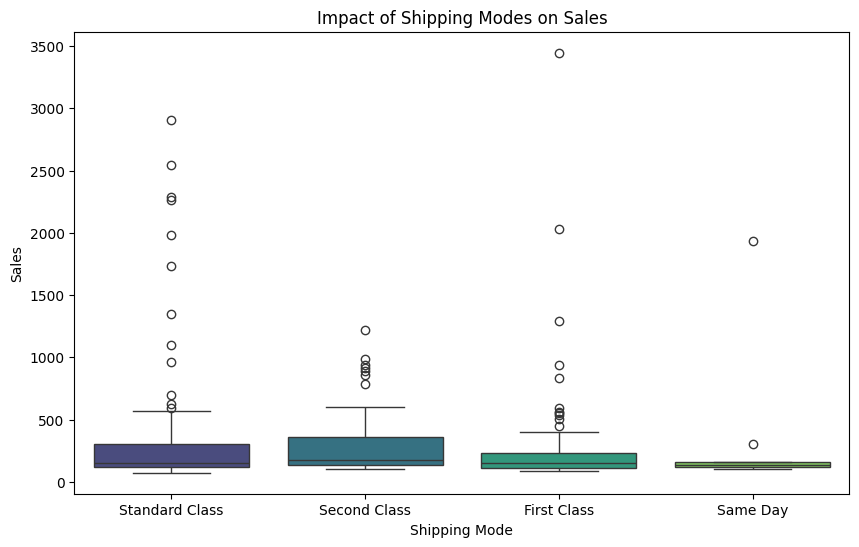

In [28]:
# Frequency of each shipping mode
shipping_mode_counts = df['Ship Mode'].value_counts()

# Plotting distribution of shipping modes
plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, palette="viridis")
plt.title('Distribution of Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Frequency')
plt.show()

# Impact of shipping modes on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Sales', data=df, palette="viridis")
plt.title('Impact of Shipping Modes on Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()


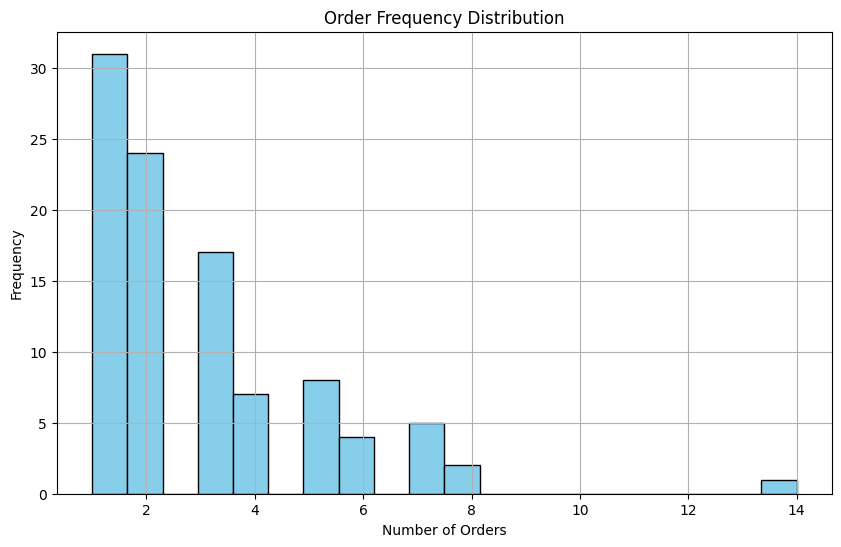

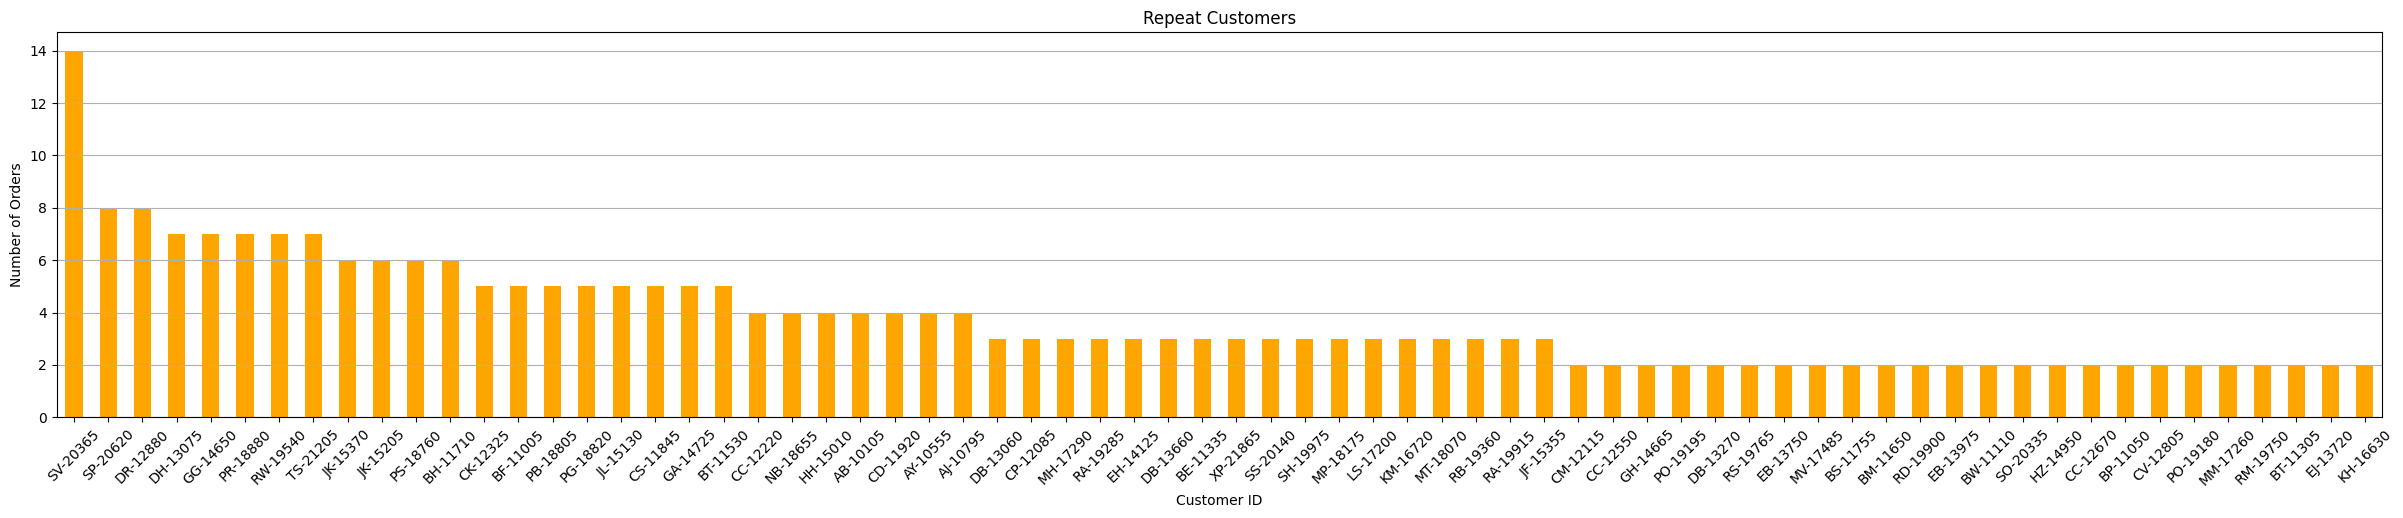

Number of unique customers: 99
Average order frequency: 2.898989898989899
Customer retention rate: 68.69%


In [29]:
# Assuming df is the DataFrame containing the data

# Calculate the frequency of orders for each customer
order_frequency = df['Customer ID'].value_counts()

# Identify repeat purchasers (customers with more than one order)
repeat_customers = order_frequency[order_frequency > 1]

# Calculate the number of unique customers
num_unique_customers = len(order_frequency)

# Calculate the average order frequency
avg_order_frequency = order_frequency.mean()

# Calculate customer retention rate
num_repeat_customers = len(repeat_customers)
customer_retention_rate = (num_repeat_customers / num_unique_customers) * 100

# Visualize order frequency distribution
plt.figure(figsize=(10, 6))
order_frequency.plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Order Frequency Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize repeat customers
plt.figure(figsize=(30, 5))
repeat_customers.plot(kind='bar', color='orange')
plt.title('Repeat Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display summary statistics
print(f"Number of unique customers: {num_unique_customers}")
print(f"Average order frequency: {avg_order_frequency}")
print(f"Customer retention rate: {customer_retention_rate:.2f}%")


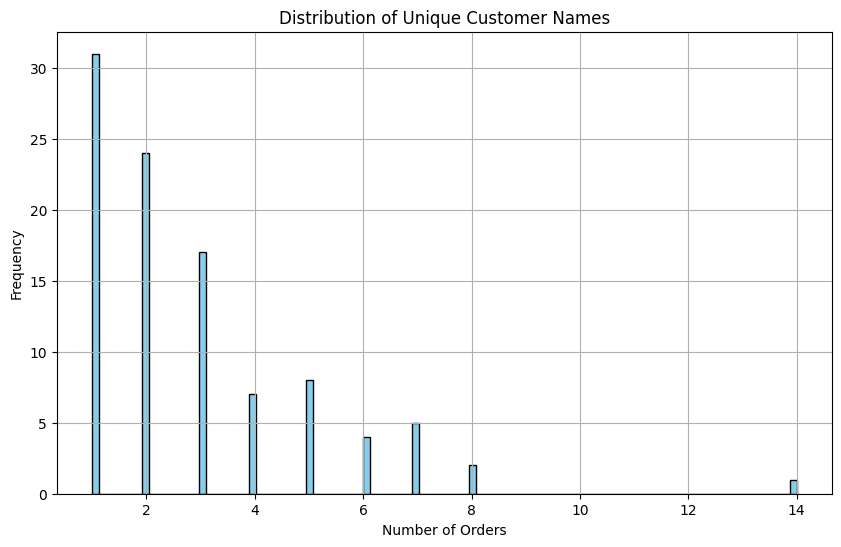

Top 10 Customer Names with the Highest Frequency:
Customer Name
Seth Vernon         14
Stefania Perrino     8
Dan Reichenbach      8
Dave Hallsten        7
Greg Guthrie         7
Patrick Ryan         7
Rick Wilson          7
Thomas Seio          7
Jay Kimmel           6
Jamie Kunitz         6
Name: count, dtype: int64


In [30]:
# Count the frequency of each unique customer name
customer_name_counts = df['Customer Name'].value_counts()

# Check the number of unique customer names
num_unique_names = len(customer_name_counts)

# Plot the distribution of unique customer names
plt.figure(figsize=(10, 6))
customer_name_counts.hist(bins=num_unique_names, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Customer Names')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

# Display potential errors or anomalies in customer names
print("Top 10 Customer Names with the Highest Frequency:")
print(customer_name_counts.head(10))


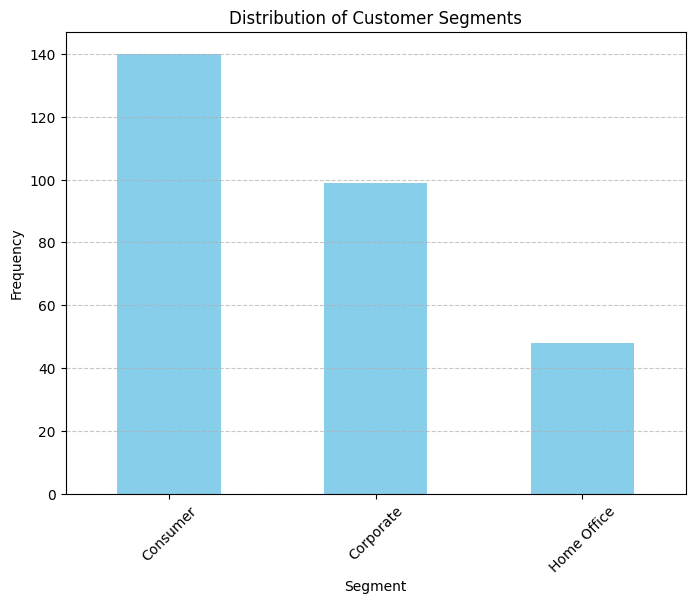

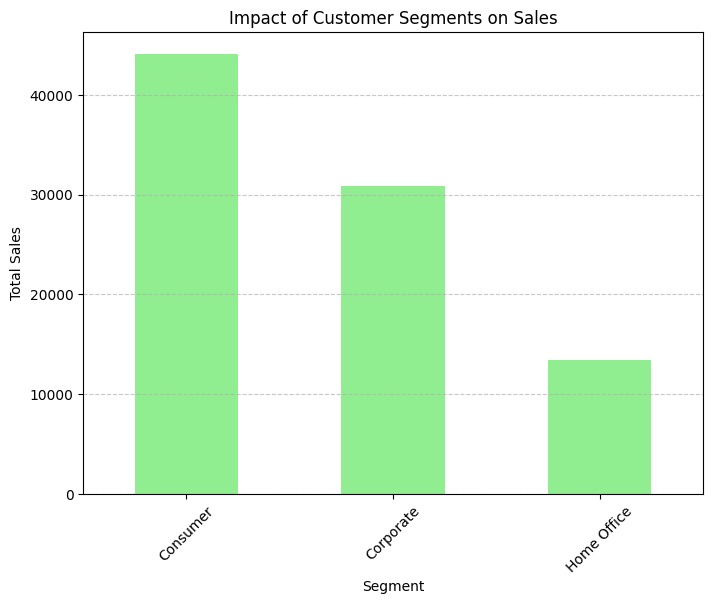

In [31]:
# Count the frequency of each segment
segment_counts = df['Segment'].value_counts()

# Plotting the distribution of customer segments
plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculating total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum()

# Plotting the impact of segments on sales
plt.figure(figsize=(8, 6))
segment_sales.plot(kind='bar', color='lightgreen')
plt.title('Impact of Customer Segments on Sales')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


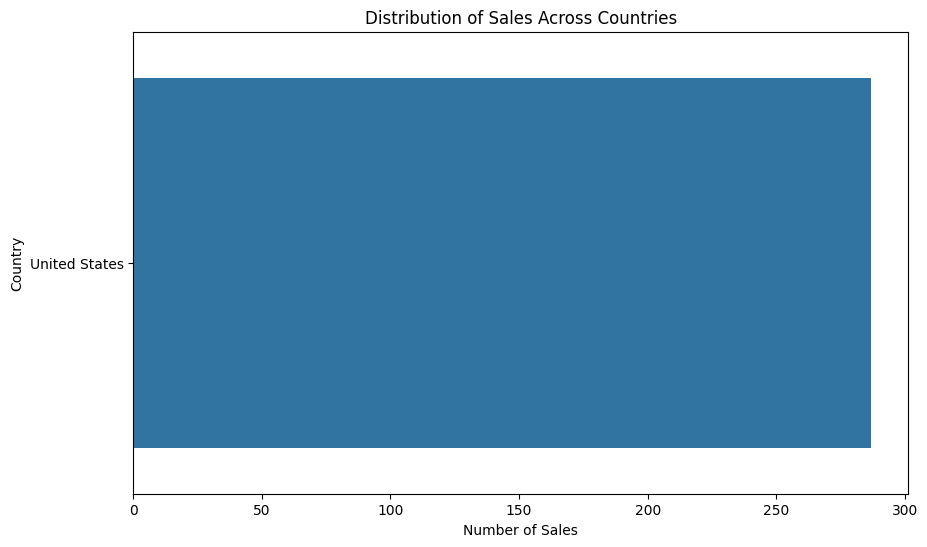

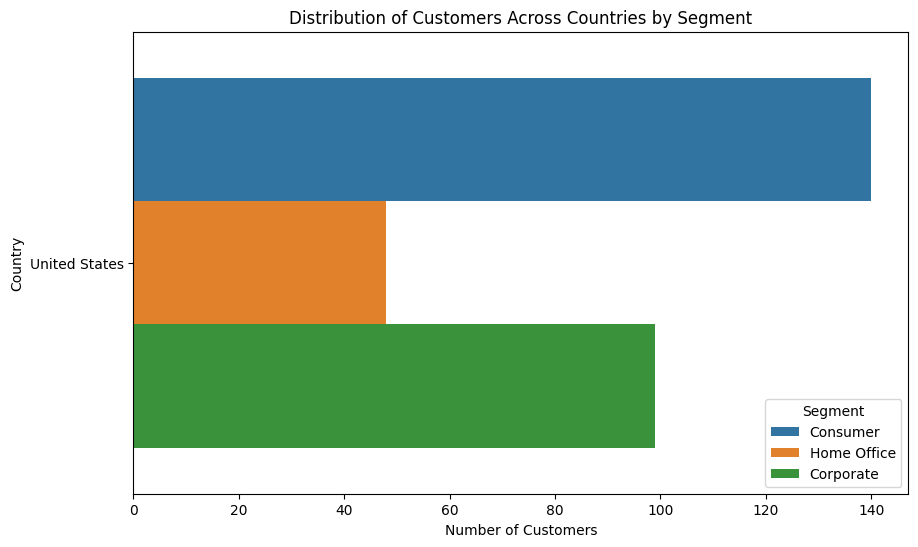

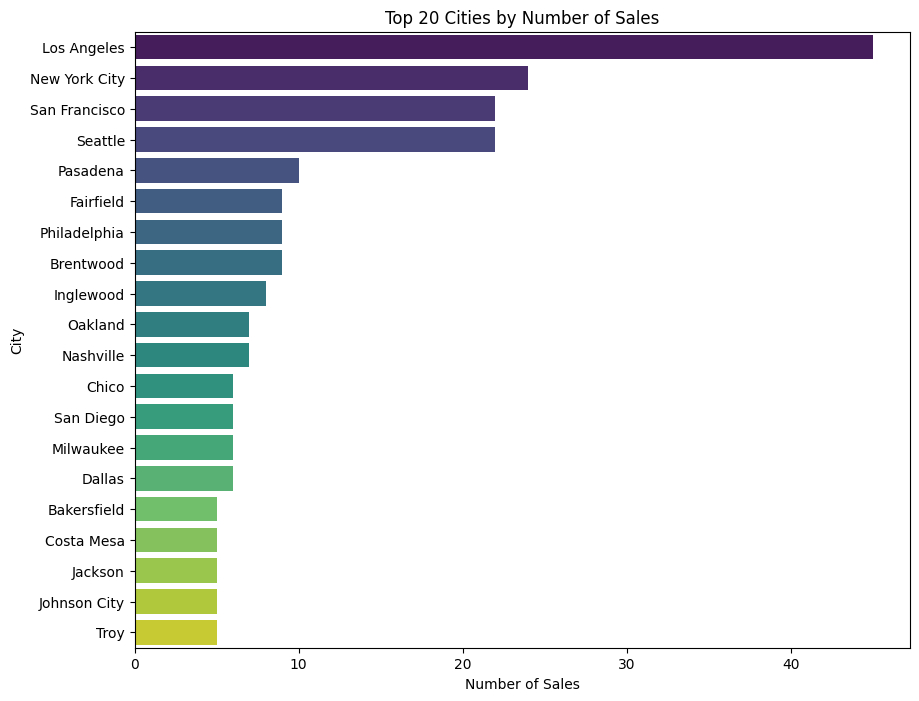

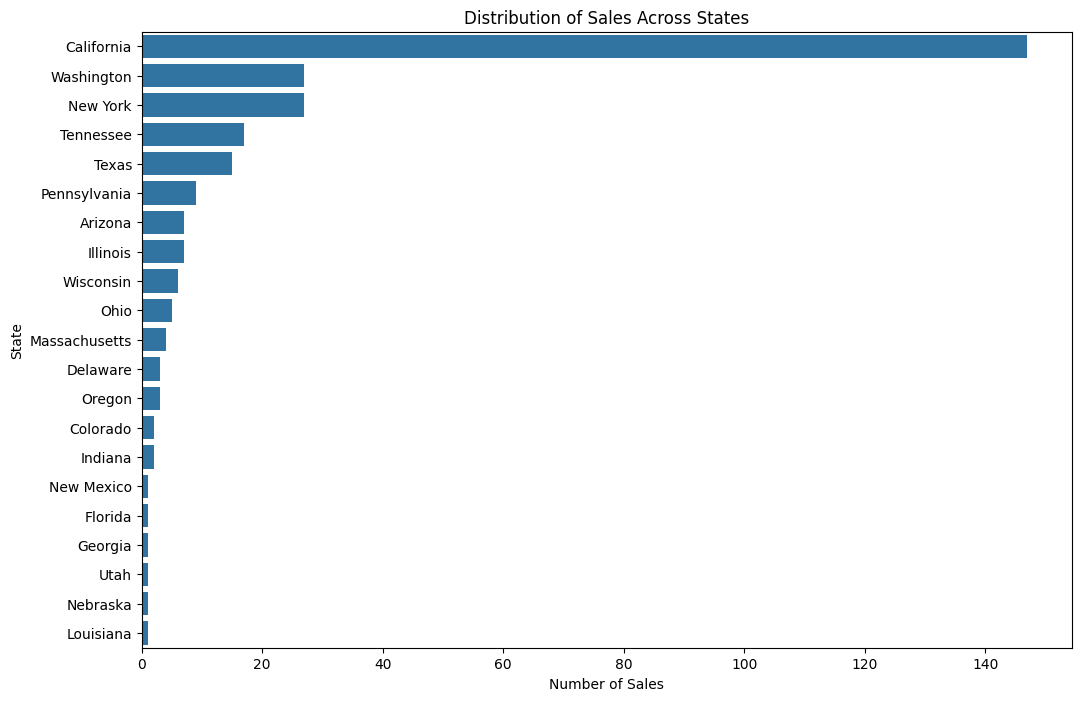

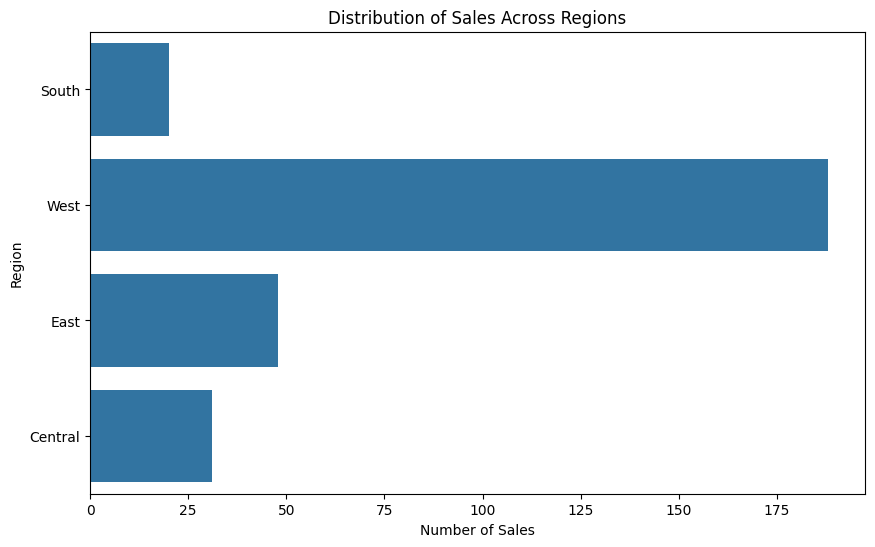

In [32]:
# Distribution of sales across countries
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Country'])
plt.title('Distribution of Sales Across Countries')
plt.xlabel('Number of Sales')
plt.ylabel('Country')
plt.show()

# Distribution of customers across countries
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Country'], hue=df['Segment'])
plt.title('Distribution of Customers Across Countries by Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.legend(title='Segment')
plt.show()

# Distribution of sales across cities
plt.figure(figsize=(10, 8))
top_cities = df['City'].value_counts().head(20)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 20 Cities by Number of Sales')
plt.xlabel('Number of Sales')
plt.ylabel('City')
plt.show()

# Distribution of sales across states
plt.figure(figsize=(12, 8))
sns.countplot(y=df['State'], order=df['State'].value_counts().index)
plt.title('Distribution of Sales Across States')
plt.xlabel('Number of Sales')
plt.ylabel('State')
plt.show()

# Distribution of sales across regions
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Region'])
plt.title('Distribution of Sales Across Regions')
plt.xlabel('Number of Sales')
plt.ylabel('Region')
plt.show()


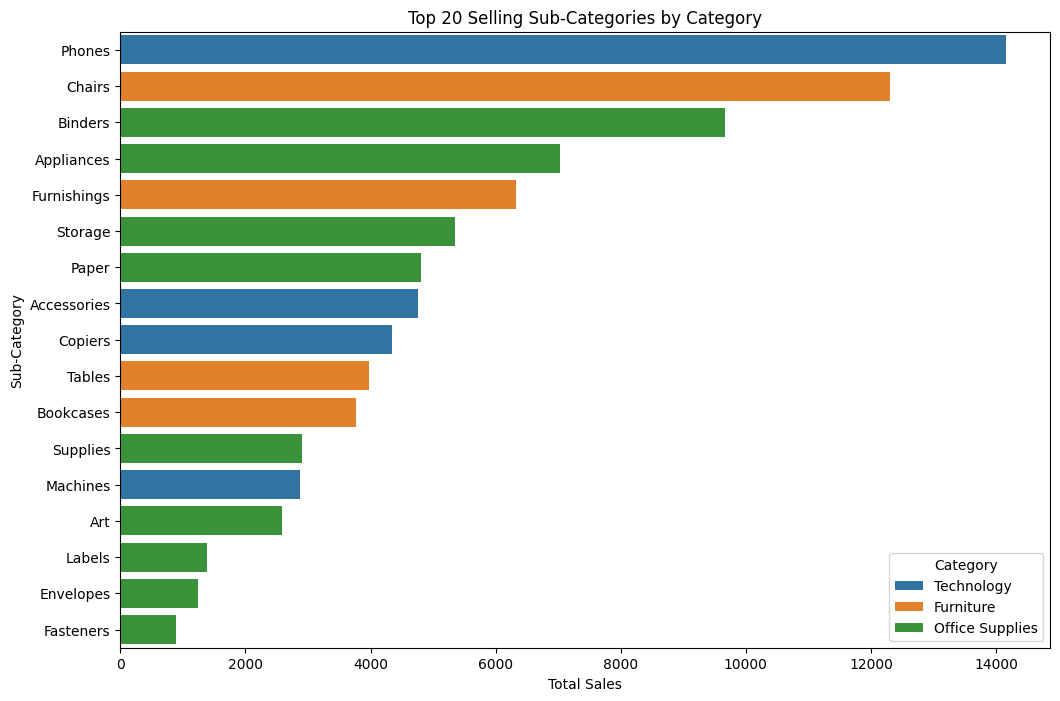

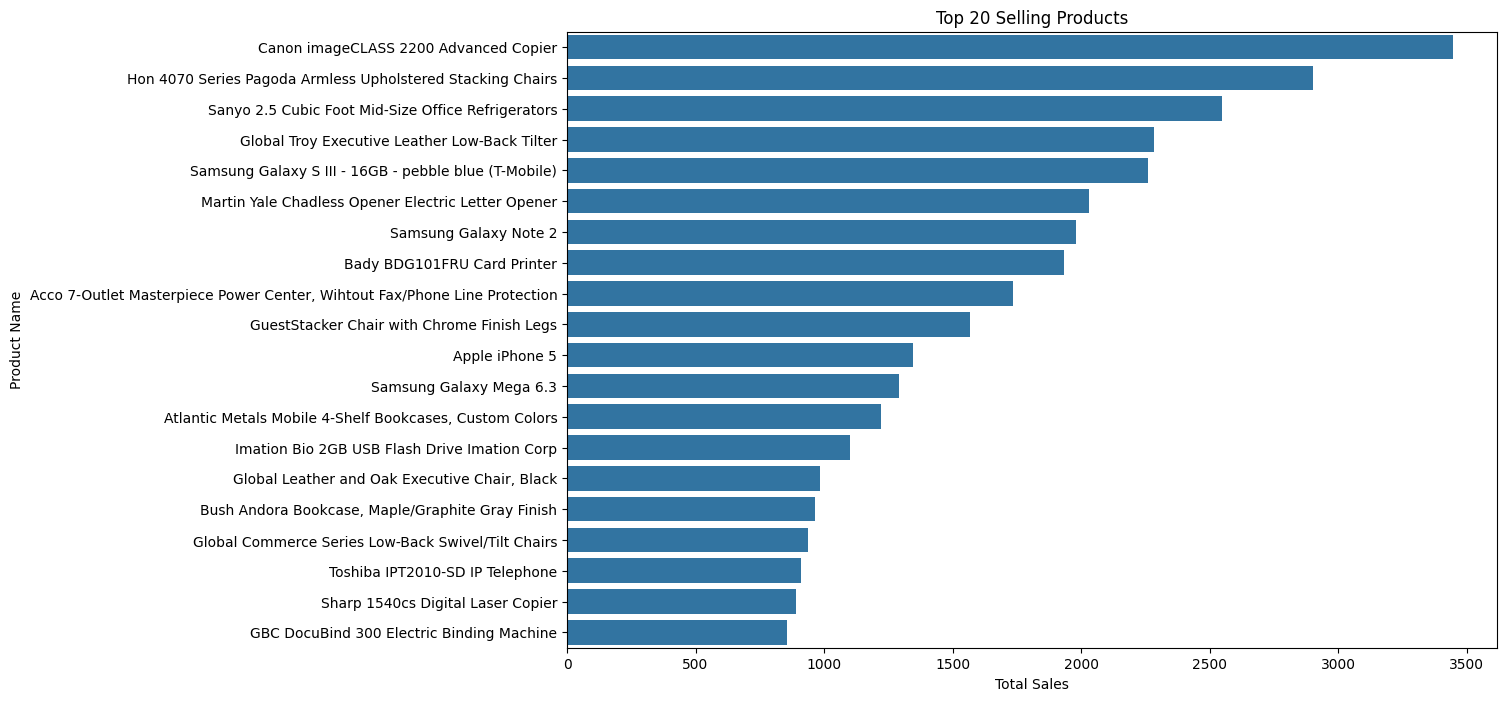

In [33]:
# Grouping data by Category and Sub-Category and summing up sales
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Sorting categories by total sales
category_sales_sorted = category_sales.sort_values(by='Sales', ascending=False)

# Visualizing top-selling categories and sub-categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=category_sales_sorted.head(20))
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Top 20 Selling Sub-Categories by Category')
plt.show()

# Identifying top-selling products
top_products = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Visualizing top-selling products
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Product Name', data=top_products.head(20))
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Top 20 Selling Products')
plt.show()


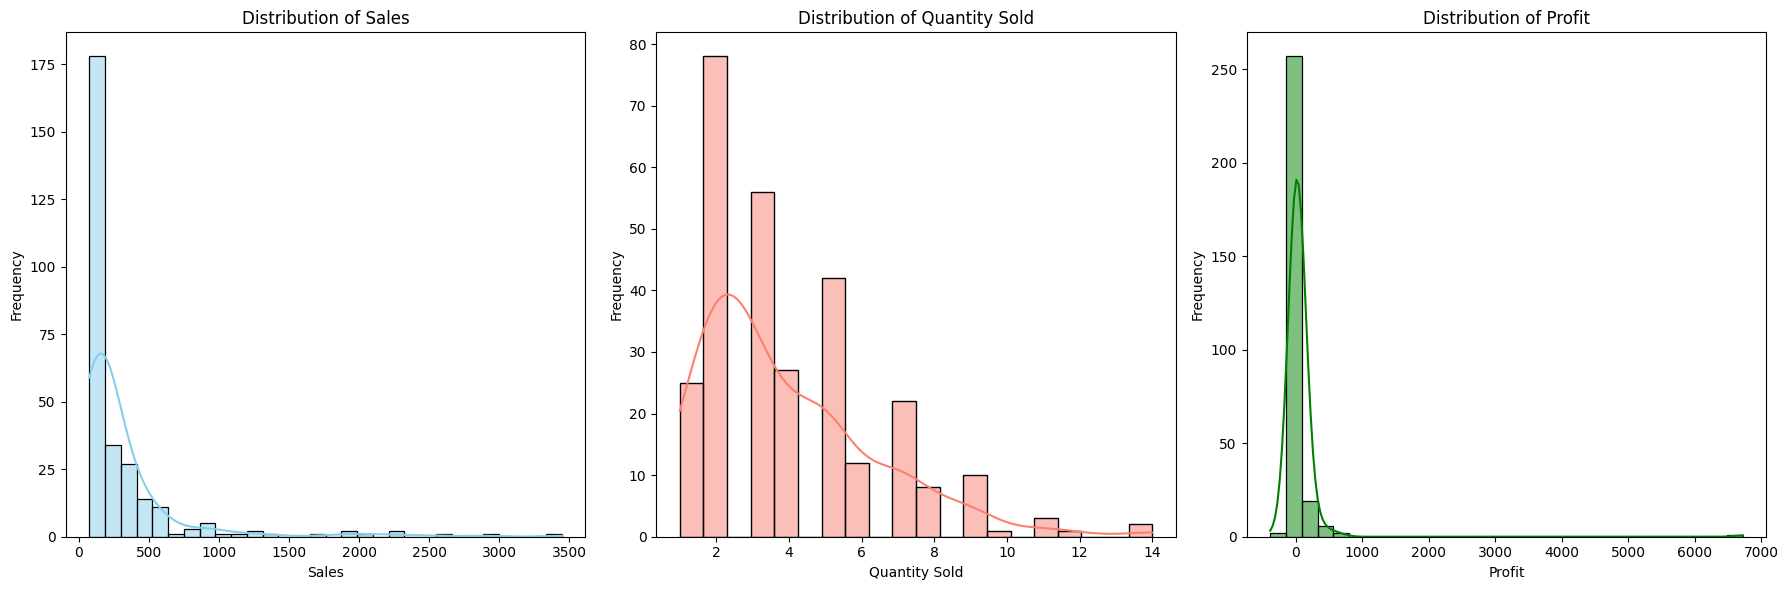

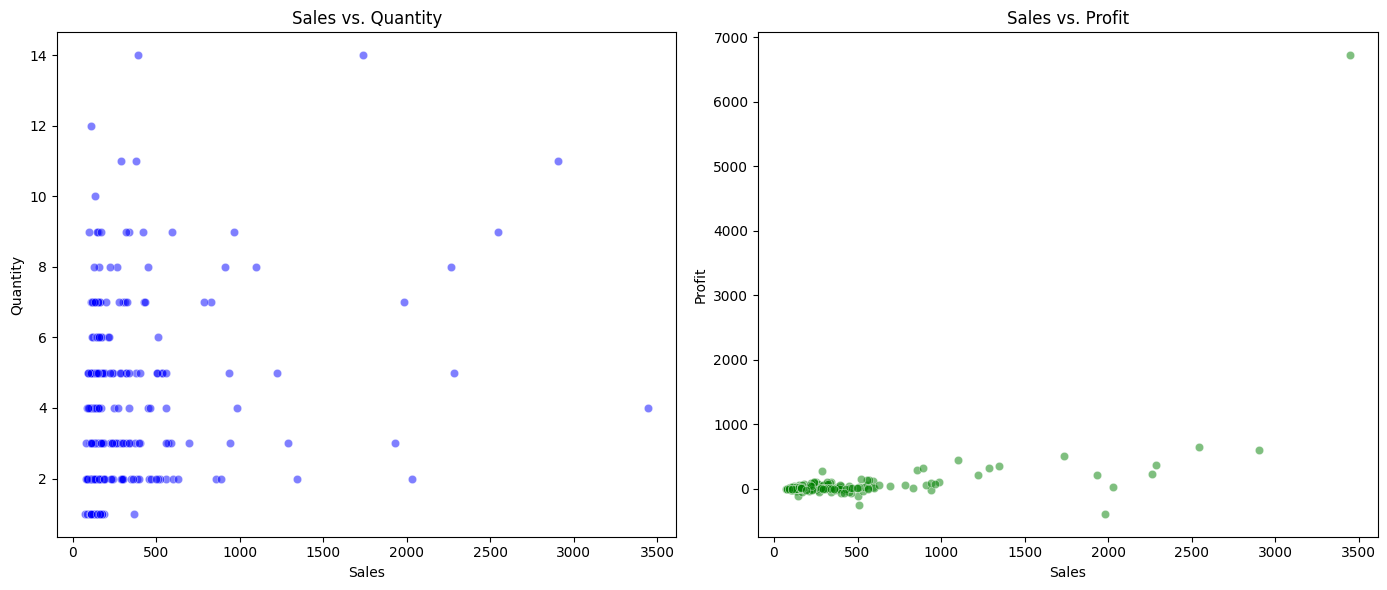

In [34]:
# Histograms for Sales, Quantity, and Profit
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Quantity'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['Profit'], bins=30, kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plots for Sales vs. Quantity and Sales vs. Profit
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Sales', y='Quantity', data=df, color='blue', alpha=0.5)
plt.title('Sales vs. Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Sales', y='Profit', data=df, color='green', alpha=0.5)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()


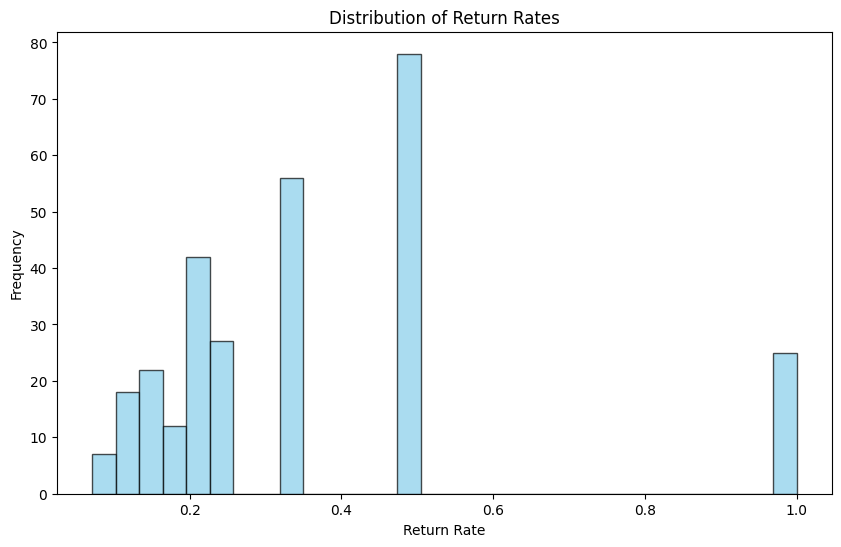

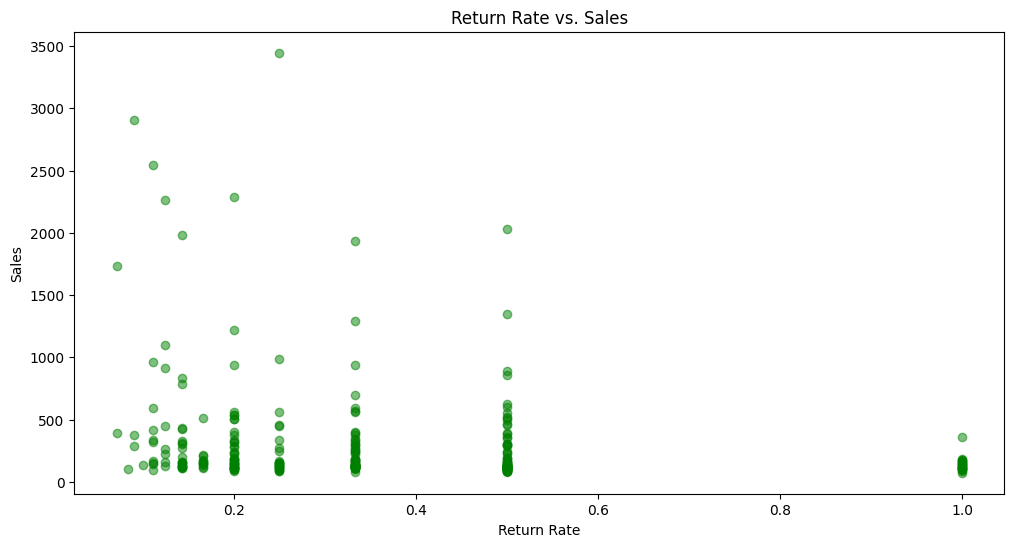

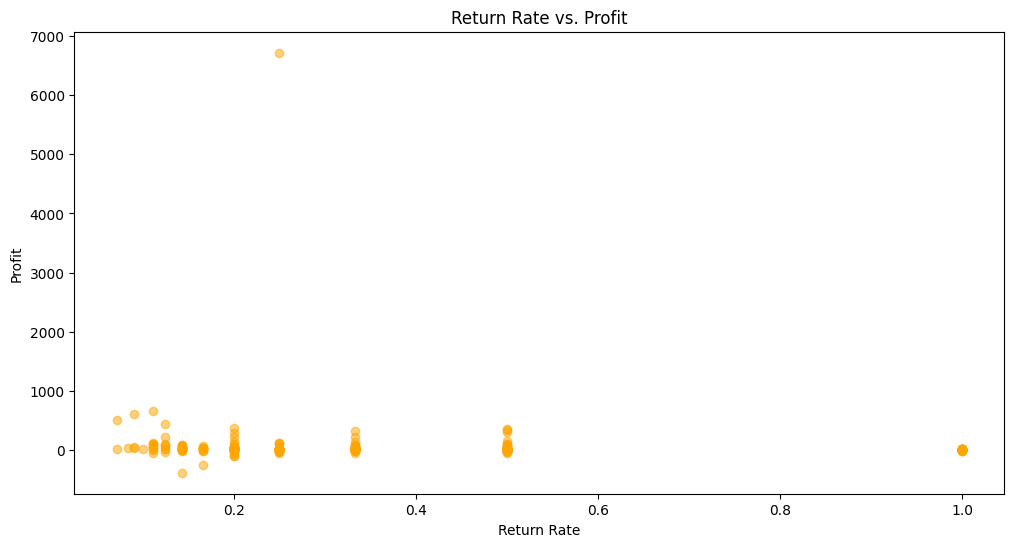

In [35]:
# Calculate return rate
df['Return Rate'] = df['Returns'] / df['Quantity']

# Plot return rate distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Return Rate'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Return Rates')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.show()

# Analyze return rate impact on sales and profitability
plt.figure(figsize=(12, 6))
plt.scatter(df['Return Rate'], df['Sales'], color='green', alpha=0.5)
plt.title('Return Rate vs. Sales')
plt.xlabel('Return Rate')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['Return Rate'], df['Profit'], color='orange', alpha=0.5)
plt.title('Return Rate vs. Profit')
plt.xlabel('Return Rate')
plt.ylabel('Profit')
plt.show()


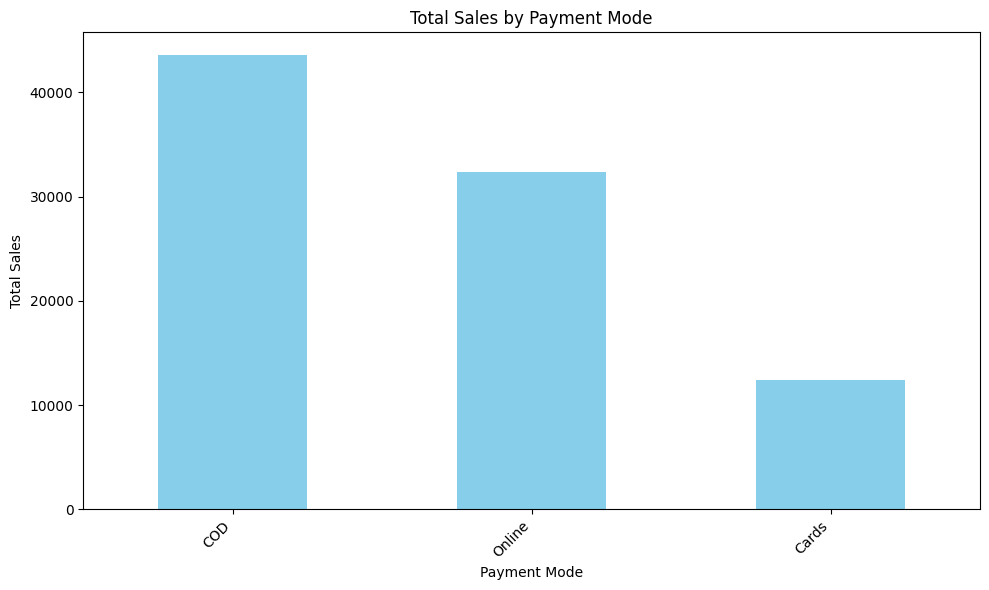

In [36]:
# Grouping data by payment mode and calculating total sales for each mode
payment_sales = df.groupby('Payment Mode')['Sales'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
payment_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 2626 to 5897
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  287 non-null    int64         
 1   Order ID          287 non-null    object        
 2   Order Date        287 non-null    datetime64[ns]
 3   Ship Date         287 non-null    datetime64[ns]
 4   Ship Mode         287 non-null    object        
 5   Customer ID       287 non-null    object        
 6   Customer Name     287 non-null    object        
 7   Segment           287 non-null    object        
 8   Country           287 non-null    object        
 9   City              287 non-null    object        
 10  State             287 non-null    object        
 11  Region            287 non-null    object        
 12  Product ID        287 non-null    object        
 13  Category          287 non-null    object        
 14  Sub-Category      287 non-n

In [38]:
# Example code for feature engineering
# Assuming df is your DataFrame

# Extracting month and year from Order Date
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month

# Aggregating sales data by month
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()


In [39]:
# Example code for splitting data
# Assuming monthly_sales is your DataFrame

# Assuming we want to predict future sales for the next 6 months
training_data = monthly_sales[:-6]
testing_data = monthly_sales[-6:]


In [40]:
df_cleaned = df.dropna(subset=['Order Date', 'Ship Date'])

In [41]:
# Check DataFrame information
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 2626 to 5897
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  287 non-null    int64         
 1   Order ID          287 non-null    object        
 2   Order Date        287 non-null    datetime64[ns]
 3   Ship Date         287 non-null    datetime64[ns]
 4   Ship Mode         287 non-null    object        
 5   Customer ID       287 non-null    object        
 6   Customer Name     287 non-null    object        
 7   Segment           287 non-null    object        
 8   Country           287 non-null    object        
 9   City              287 non-null    object        
 10  State             287 non-null    object        
 11  Region            287 non-null    object        
 12  Product ID        287 non-null    object        
 13  Category          287 non-null    object        
 14  Sub-Category      287 non-n

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with 'Order Date' as the timestamp and 'Sales' as the target variable

# Step 1: Feature Engineering - Lagged Variables
df['Previous_Sales'] = df['Sales'].shift(1).fillna(0)  # Lagged variable for previous sales

# Step 2: Split the data into training and testing sets
train_size = 0.8  # 80% training data, 20% testing data
train, test = train_test_split(df, train_size=train_size, shuffle=False)

# Step 3: Hyperparameter Tuning
# Grid search for Ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Range of alpha values to search
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(train[['Previous_Sales']], train['Sales'])

# Best hyperparameters for Ridge regression
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Step 4: Model Selection
# Ridge Regression
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_scores = cross_val_score(ridge_model, train[['Previous_Sales']], train['Sales'], cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-ridge_scores.mean())

# Lasso Regression
lasso = Lasso()
lasso_scores = cross_val_score(lasso, train[['Previous_Sales']], train['Sales'], cv=5, scoring='neg_mean_squared_error')
lasso_rmse_scores = np.sqrt(-lasso_scores.mean())

# Compare RMSE scores
print("Ridge Regression RMSE:", ridge_rmse_scores)
print("Lasso Regression RMSE:", lasso_rmse_scores)

# Step 5: Error Analysis (Optional)
# Analyze errors made by the best performing model (e.g., Ridge regression) on the validation dataset
# Identify patterns or areas for improvement


Ridge Regression RMSE: 471.62577419256286
Lasso Regression RMSE: 471.62590304915045


In [43]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with features and target variable
X = df[['Previous_Sales']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [45]:
from sklearn.linear_model import RidgeCV

# Initialize RidgeCV model
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Fit the Ridge regression model
ridge.fit(X_train_scaled, y_train)

# Make predictions
ridge_predictions = ridge.predict(X_test_scaled)

# Calculate RMSE
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
print("Ridge Regression RMSE:", ridge_rmse)


Ridge Regression RMSE: 421.8609668081497


In [46]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV model
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Fit the Lasso regression model
lasso.fit(X_train_scaled, y_train)

# Make predictions
lasso_predictions = lasso.predict(X_test_scaled)

# Calculate RMSE
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
print("Lasso Regression RMSE:", lasso_rmse)


Lasso Regression RMSE: 423.9691599806926


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize the Ridge Regression model
ridge = Ridge()

# Initialize Grid Search Cross Validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and best RMSE score
best_alpha = grid_search.best_params_['alpha']
best_rmse = (-grid_search.best_score_) ** 0.5

print("Best Alpha:", best_alpha)
print("Best RMSE:", best_rmse)


Best Alpha: 100
Best RMSE: 446.95395784013346


In [48]:
# Train the Ridge Regression model with the best alpha value
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
ridge_predictions = best_ridge_model.predict(X_test)

# Calculate RMSE on the testing data
ridge_rmse_test = mean_squared_error(y_test, ridge_predictions, squared=False)
print("Ridge Regression RMSE on Testing Data:", ridge_rmse_test)


Ridge Regression RMSE on Testing Data: 421.4200946829135


In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X contains the features and y contains the target variable (Sales)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge Regression model
ridge_model = Ridge(alpha=100)
ridge_model.fit(X_train, y_train)


Ridge(alpha=100)

In [50]:
# Assuming X_future contains the features for future predictions
# You need to define the features for the future period you want to predict
# This could include features like previous sales, time-related features, etc.

# For demonstration purposes, let's assume X_future contains the same features as X_test
X_future = X_test


In [51]:
# Assuming X_future contains the features for future predictions
predictions = ridge_model.predict(X_future)


In [52]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)


RMSE: 421.4200946829135


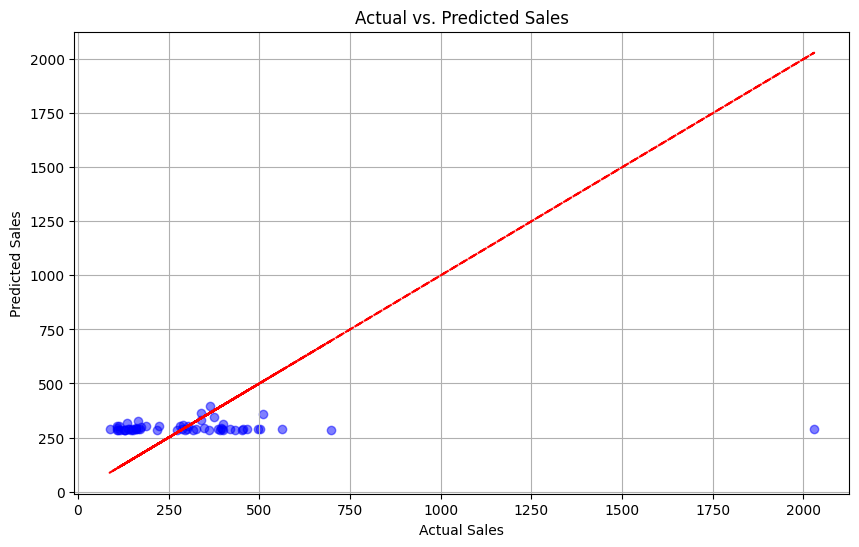

In [53]:
import matplotlib.pyplot as plt

# Extract actual and predicted sales values
actual_sales = test['Sales']
predicted_sales = predictions

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_sales, predicted_sales, color='blue', alpha=0.5)
plt.plot(actual_sales, actual_sales, color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
r_squared = r2_score(test['Sales'], predictions)
print("R-squared:", r_squared)

# Calculate MAE
mae = mean_absolute_error(test['Sales'], predictions)
print("Mean Absolute Error:", mae)


R-squared: -0.005673907257678579
Mean Absolute Error: 148.83379037665176


Trying a different model!!

In [55]:
# 1. Data Loading
import pandas as pd

# Load your dataset
df = pd.read_excel("SuperStoreSalesDataSet.xlsx")

# Check the first few rows of the DataFrame to verify data loading
print(df.head())

# 2. Handling Missing Values (if necessary)
# df.dropna(inplace=True)  # Uncomment this line if there are missing values to be dropped

# 3. Timestamp Format
# Ensure timestamp column is in datetime format
# df['Order Date'] = pd.to_datetime(df['Order Date'])

# 4. Column Renaming
# Rename columns to 'ds' and 'y' for Prophet
# df.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# 5. Subset Data
# start_date = '2022-01-01'
# end_date = '2022-12-31'
# df = df[(df['ds'] >= start_date) & (df['ds'] <= end_date)]

# 6. Visualization
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(df['ds'], df['y'], marker='o', linestyle='-')
# plt.title('Historical Sales Data')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.grid(True)
# plt.show()


   Row ID+O6G3A1:R6        Order ID Order Date  Ship Date       Ship Mode  \
0              4918  CA-2019-160304 2019-01-01 2019-01-07  Standard Class   
1              4919  CA-2019-160304 2019-01-02 2019-01-07  Standard Class   
2              4920  CA-2019-160304 2019-01-02 2019-01-07  Standard Class   
3              3074  CA-2019-125206 2019-01-03 2019-01-05     First Class   
4              8604  US-2019-116365 2019-01-03 2019-01-08  Standard Class   

  Customer ID      Customer Name    Segment        Country          City  ...  \
0    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
1    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
2    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
3    LR-16915       Lena Radford   Consumer  United States   Los Angeles  ...   
4    CA-12310  Christine Abelman  Corporate  United States   San Antonio  ...   

          Category Sub-Category  \
0        Furnit

In [56]:
# 1. Remove unnecessary columns
df.drop(['ind1', 'ind2'], axis=1, inplace=True)

# 2. Handle missing values in the 'Returns' column
# For example, if you want to fill missing values with 0
df['Returns'].fillna(0, inplace=True)

# Display the first few rows of the cleaned DataFrame
print(df.head())


   Row ID+O6G3A1:R6        Order ID Order Date  Ship Date       Ship Mode  \
0              4918  CA-2019-160304 2019-01-01 2019-01-07  Standard Class   
1              4919  CA-2019-160304 2019-01-02 2019-01-07  Standard Class   
2              4920  CA-2019-160304 2019-01-02 2019-01-07  Standard Class   
3              3074  CA-2019-125206 2019-01-03 2019-01-05     First Class   
4              8604  US-2019-116365 2019-01-03 2019-01-08  Standard Class   

  Customer ID      Customer Name    Segment        Country          City  ...  \
0    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
1    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
2    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
3    LR-16915       Lena Radford   Consumer  United States   Los Angeles  ...   
4    CA-12310  Christine Abelman  Corporate  United States   San Antonio  ...   

    Region       Product ID         Category Sub-C